In [23]:
import os
path = os.getcwd()
parent = os.path.dirname(path)
file_path = parent + "/csv/use-case-besu-fabric-6-events.csv"
file_path_other_model = parent + "/csv/dummy-use-case-invalid.csv"

import sys

if __name__ == '__main__':
    print(sys.argv)
    print(file_path)



# import sys

# accept command line arguments
# inputArg1 = sys.argv[1]

#print('inputArg1: ',inputArg1)


['/home/rafaelapb/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9003', '--control=9001', '--hb=9000', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"bc68eb72-21dc-4332-b2ca-fba4a5b9f8a5"', '--shell=9002', '--transport="tcp"', '--iopub=9004', '--f=/home/rafaelapb/.local/share/jupyter/runtime/kernel-v2-1697YyCnY35g10ah.json']
/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main/csv/use-case-besu-fabric-6-events.csv


In [24]:
# uncomment if problems with dependencies
#%pip install pm4py
#%pip install pandas
import pm4py
import datetime as dt
import time
import pandas

# process mining
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

from pm4py.objects.conversion.process_tree import converter as pt_converter



In [25]:
def import_csv_original(file_path):
    event_log = pandas.read_csv(file_path, sep=';')
    event_log = pm4py.format_dataframe(event_log, case_id='caseID', activity_key='methodName', timestamp_key='timestamp')
    return event_log

def getStartActivities(event_log):
    s = pm4py.get_start_activities(event_log)
    print("Start activities: {}\n".format(s))
    return s
def getEndActivities(event_log):
    e = pm4py.get_end_activities(event_log)
    print("End activities: {}\n".format(e))
    return (e)

def getAttributeFromLog(event_log, attr):
    entries = pm4py.get_event_attribute_values(event_log,attr)
    print("Entries: {}\n".format(entries))
    return entries

In [26]:
print(file_path)
log = import_csv_original(file_path)
log_other_model = import_csv_original(file_path_other_model)
print(log)
print("leght is", len(log))
print(log_other_model)
print("leght is", len(log_other_model))
startAct = getStartActivities(log)
endAct = getEndActivities(log)
timestamps = getAttributeFromLog(log, "timestamp")



/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main/csv/use-case-besu-fabric-6-events.csv
        caseID                                          receiptID  \
0  FABRIC_BESU  0xd184f5a49d170e2f7f9fcb7996e8db3d7764c13d798f...   
1  FABRIC_BESU  0xc315d4ee310a04d4c0949279f4edba34fa8fb35cf5fe...   
2  FABRIC_BESU  7fddc8aef1a46f23fa33891b4ab6b951c7224671575b57...   
3  FABRIC_BESU  7c395a691ba45d7fe921fb5f69b40fbff810459f8f9f27...   
4  FABRIC_BESU  a6b747257c6e92b8c85292561999dad7dcf56051f2c6c6...   
5  FABRIC_BESU  fc20c6cd4f1cbd6b06da6cd1fc846a0b2051382096d63c...   

                         timestamp blockchainID  \
0 2022-06-24 14:47:43.716000+00:00      BESU_2X   
1 2022-06-24 14:47:45.312000+00:00      BESU_2X   
2 2022-06-24 14:47:47.102000+00:00     FABRIC_2   
3 2022-06-24 14:47:49.361000+00:00     FABRIC_2   
4 2022-06-24 14:47:51.573000+00:00     FABRIC_2   
5 2022-06-24 14:47:53.767000+00:00     FABRIC_2   

                   

->( 'createAsset', 'lockAsset', 'MintAsset', *( 'TransferAsset', tau ), 'BurnAsset' )


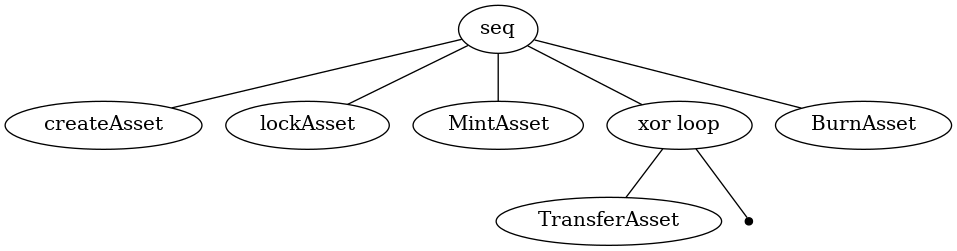

Execution Time : 0.001
Execution Time (ms): 1.402


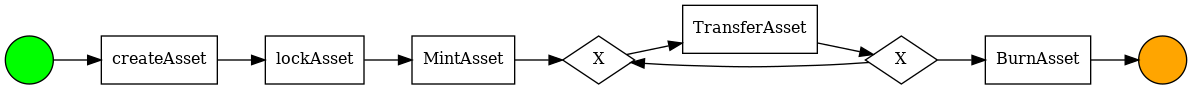

Start Time : 2571.73599414
End Time : 2571.73943057
Execution Time : 0.003
Execution Time (ms): 3.436


In [27]:
#Another way to discover the tree
# # create the process tree
#tree = inductive_miner.apply_tree(log)

# viz
#gviz = pt_visualizer.apply(tree)
#pt_visualizer.view(gviz)# convert the process tree to a petri net

start_time = time.perf_counter()
process_tree = pm4py.discover_process_tree_inductive(log)
print(process_tree)
end_time = time.perf_counter()
pm4py.view_process_tree(process_tree)

start_time_2 = time.perf_counter()
bpmn_model = pm4py.convert_to_bpmn(process_tree)
end_time_2 = time.perf_counter()
print(f"Execution Time : {end_time_2 - start_time_2:0.3f}" )
timeDiff_2 = end_time_2 - start_time_2
print(f"Execution Time (ms): {timeDiff_2*1000:0.3f}" )

pm4py.view_bpmn(bpmn_model)

print(f"Start Time : {start_time}")
print(f"End Time : {end_time}")
timeDiff_3 = end_time - start_time
print(f"Execution Time : {timeDiff_3:0.3f}")
print(f"Execution Time (ms): {timeDiff_3*1000:0.3f}" )


#net, initial_marking, final_marking = pt_converter.apply(tree)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}



/home/rafaelapb/.local/lib/python3.8/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]


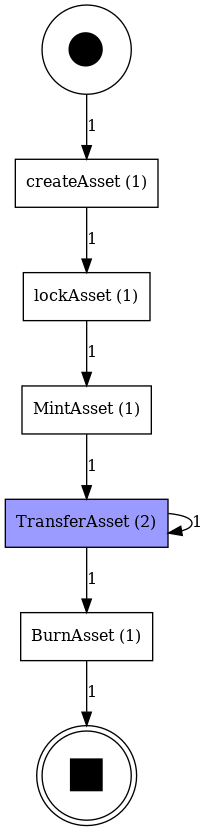

{'createAsset': (node:createAsset connections:{lockAsset:[0.5]}), 'lockAsset': (node:lockAsset connections:{MintAsset:[0.5]}), 'MintAsset': (node:MintAsset connections:{TransferAsset:[0.5]}), 'TransferAsset': (node:TransferAsset connections:{TransferAsset:[0.5], BurnAsset:[0.5]}), 'BurnAsset': (node:BurnAsset connections:{})}


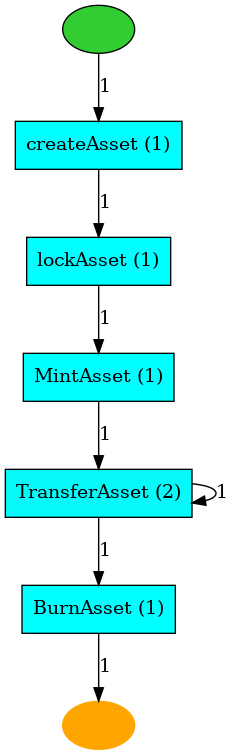

In [28]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

map = pm4py.discover_heuristics_net(log)
print(map)
pm4py.view_heuristics_net(map)

/home/rafaelapb/.local/lib/python3.8/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]
/home/rafaelapb/.local/lib/python3.8/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]


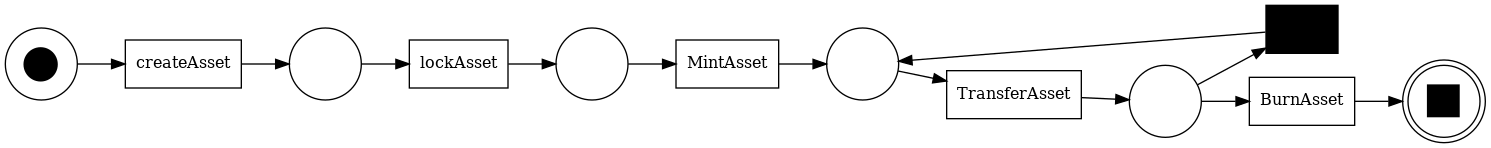

In [29]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)